In [45]:
# --- Installing Libraries ---
!pip install ydata-profiling
!pip install pywaffle

# --- Importing Libraries ---
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pandas_profiling
import seaborn as sns
import warnings
import os
import yellowbrick
import scipy.cluster.hierarchy as shc
import matplotlib.patches as patches

from matplotlib.patches import Rectangle
from ydata_profiling import ProfileReport
from pywaffle import Waffle
from math import isnan
from random import sample
from numpy.random import uniform
from sklearn import metrics
from sklearn.neighbors import NearestNeighbors
from sklearn.impute import KNNImputer
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.metrics import davies_bouldin_score, silhouette_score, calinski_harabasz_score
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer
from yellowbrick.style import set_palette
from yellowbrick.contrib.wrapper import wrap

# --- Libraries Settings ---
warnings.filterwarnings('ignore')
sns.set_style('whitegrid')
plt.rcParams['figure.dpi'] = 600
sns.set(rc = {'axes.facecolor': '#FBFBFB', 'figure.facecolor': '#FBFBFB'})
class clr:
    start = '\033[93m'+'\033[1m'
    color = '\033[93m'
    end = '\033[0m'

In [46]:
# leitura do dataset
dataset = pd.read_csv("/content/Wholesale customers data.csv")

# Visualização dos dados




In [47]:
dataset.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [48]:
display(dataset)

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185
...,...,...,...,...,...,...,...,...
435,1,3,29703,12051,16027,13135,182,2204
436,1,3,39228,1431,764,4510,93,2346
437,2,3,14531,15488,30243,437,14841,1867
438,1,3,10290,1981,2232,1038,168,2125


In [49]:
dataset.describe(include = "all")

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,1.322727,2.543182,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,0.468052,0.774272,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,1.000000,1.000000,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,1.000000,2.000000,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,1.000000,3.000000,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,2.000000,3.000000,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,2.000000,3.000000,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


In [50]:
dataset.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Channel           440 non-null    int64
 1   Region            440 non-null    int64
 2   Fresh             440 non-null    int64
 3   Milk              440 non-null    int64
 4   Grocery           440 non-null    int64
 5   Frozen            440 non-null    int64
 6   Detergents_Paper  440 non-null    int64
 7   Delicassen        440 non-null    int64
dtypes: int64(8)
memory usage: 27.6 KB


In [51]:
# --- Dataset Report ---
ProfileReport(dataset, title='Wholesale Customers Report', minimal=True, progress_bar=False, samples=None, correlations=None, interactions=None, explorative=True, dark_mode=True, notebook={'iframe':{'height': '600px'}}, html={'style':{'primary_color': '#FFCC00'}}, missing_diagrams={'heatmap': False, 'dendrogram': False}).to_notebook_iframe()

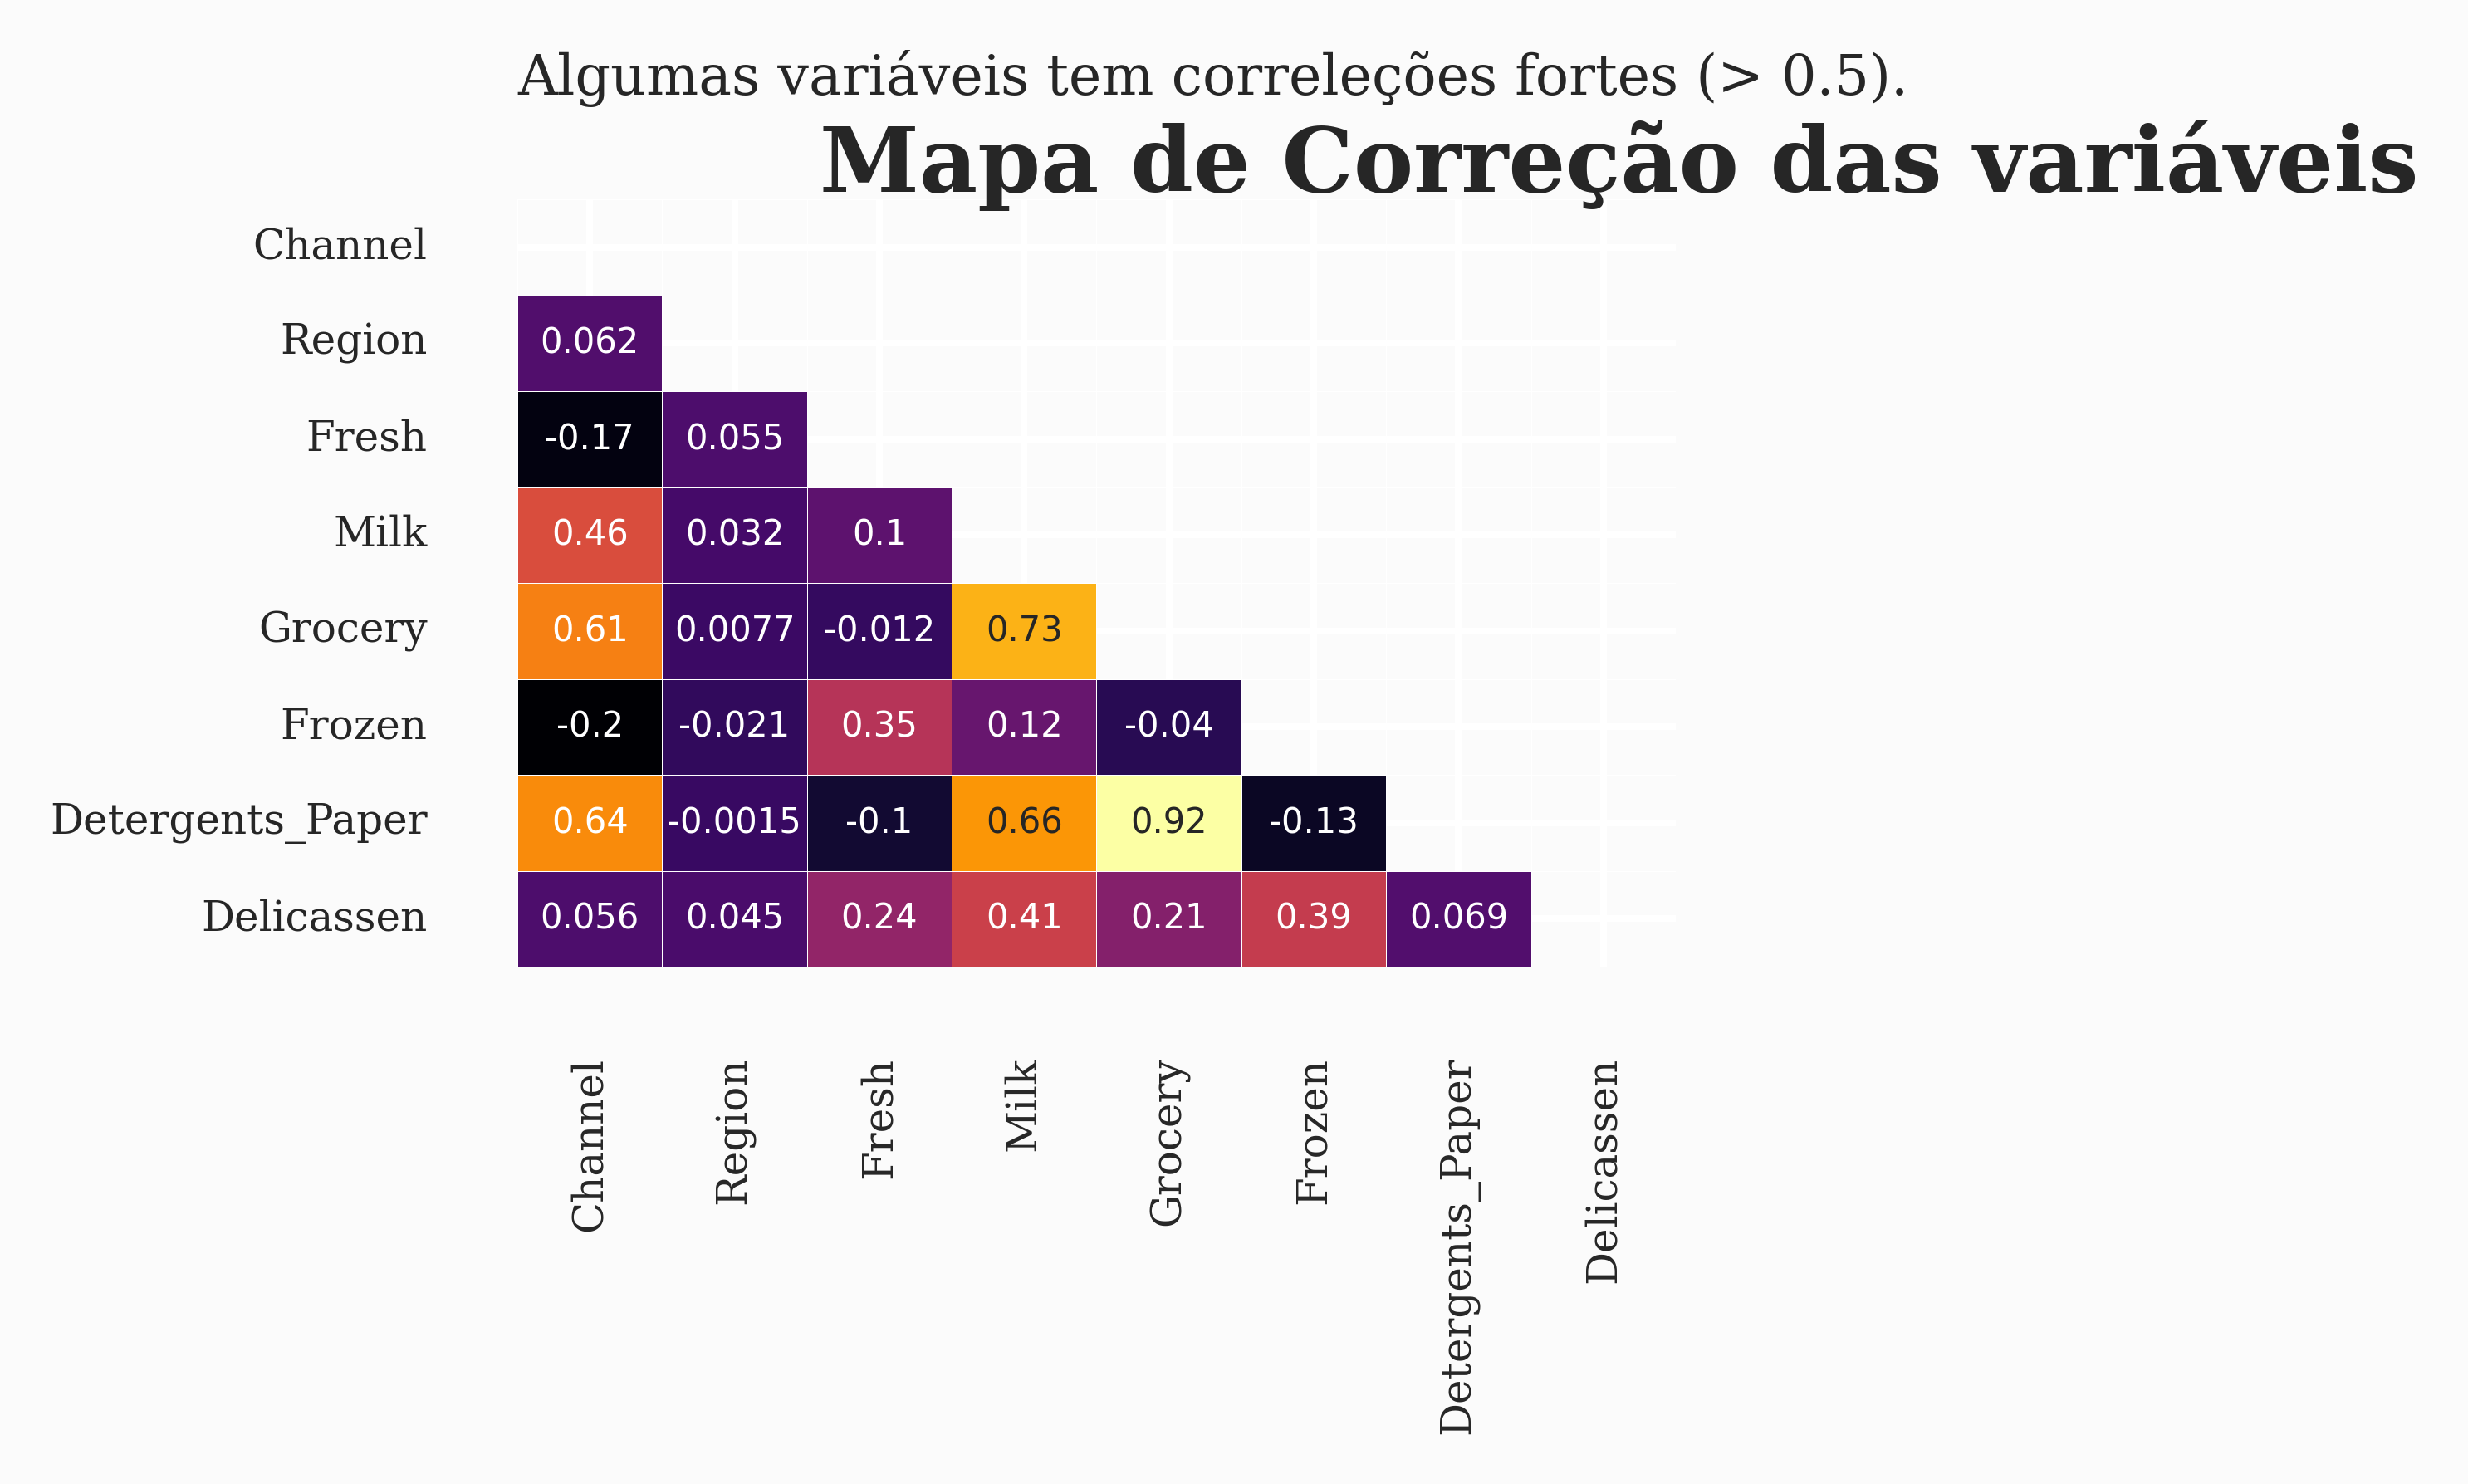

In [52]:
# --- Correlation Map (Heatmap) ---
mask = np.triu(np.ones_like(dataset.corr(), dtype=bool))
fig, ax = plt.subplots(figsize=(3, 2))
sns.heatmap(dataset.corr(), mask=mask, annot=True, cmap='inferno', linewidths=0.1, cbar=False, annot_kws={"size":5})
yticks, ylabels = plt.yticks()
xticks, xlabels = plt.xticks()
ax.set_xticklabels(xlabels, size=6, fontfamily='serif')
ax.set_yticklabels(ylabels, size=6, fontfamily='serif')
plt.suptitle('Mapa de Correção das variáveis', fontweight='heavy', x=0.327, y=0.96, ha='left', fontsize=13, fontfamily='serif')
plt.title('Algumas variáveis tem correleções fortes (> 0.5).\n', fontsize=8, fontfamily='serif', loc='left')
plt.tight_layout(rect=[0, 0.04, 1, 1.01])
plt.show();

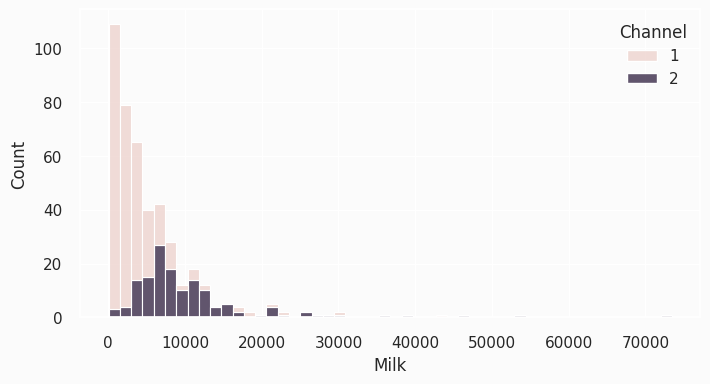

In [53]:
plt.figure(figsize = (8,4), dpi = 100)
sns.histplot(dataset,x='Milk',hue='Channel',multiple="stack")
plt.show()


# Pré-processamento

In [54]:
# Normalização da base de dados no intervalo 2 a 7
dataset_max_scaled = dataset.copy()
for column in dataset.columns[2:]:
    dataset_max_scaled[column] = dataset_max_scaled[column]  / dataset_max_scaled[column].abs().max()

display(dataset_max_scaled)

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,0.112964,0.131378,0.081494,0.003516,0.065496,0.027908
1,2,3,0.062924,0.133473,0.103126,0.028947,0.080657,0.037044
2,2,3,0.056647,0.119840,0.082820,0.039511,0.086119,0.163611
3,1,3,0.118278,0.016273,0.045495,0.105210,0.012418,0.037294
4,2,3,0.201648,0.073607,0.077581,0.064318,0.043525,0.108149
...,...,...,...,...,...,...,...,...
435,1,3,0.264848,0.163964,0.172742,0.215791,0.004458,0.045971
436,1,3,0.349778,0.019470,0.008235,0.074094,0.002278,0.048933
437,2,3,0.129566,0.210727,0.325965,0.007179,0.363509,0.038942
438,1,3,0.091751,0.026953,0.024057,0.017053,0.004115,0.044323


# Resultados

# K-Means

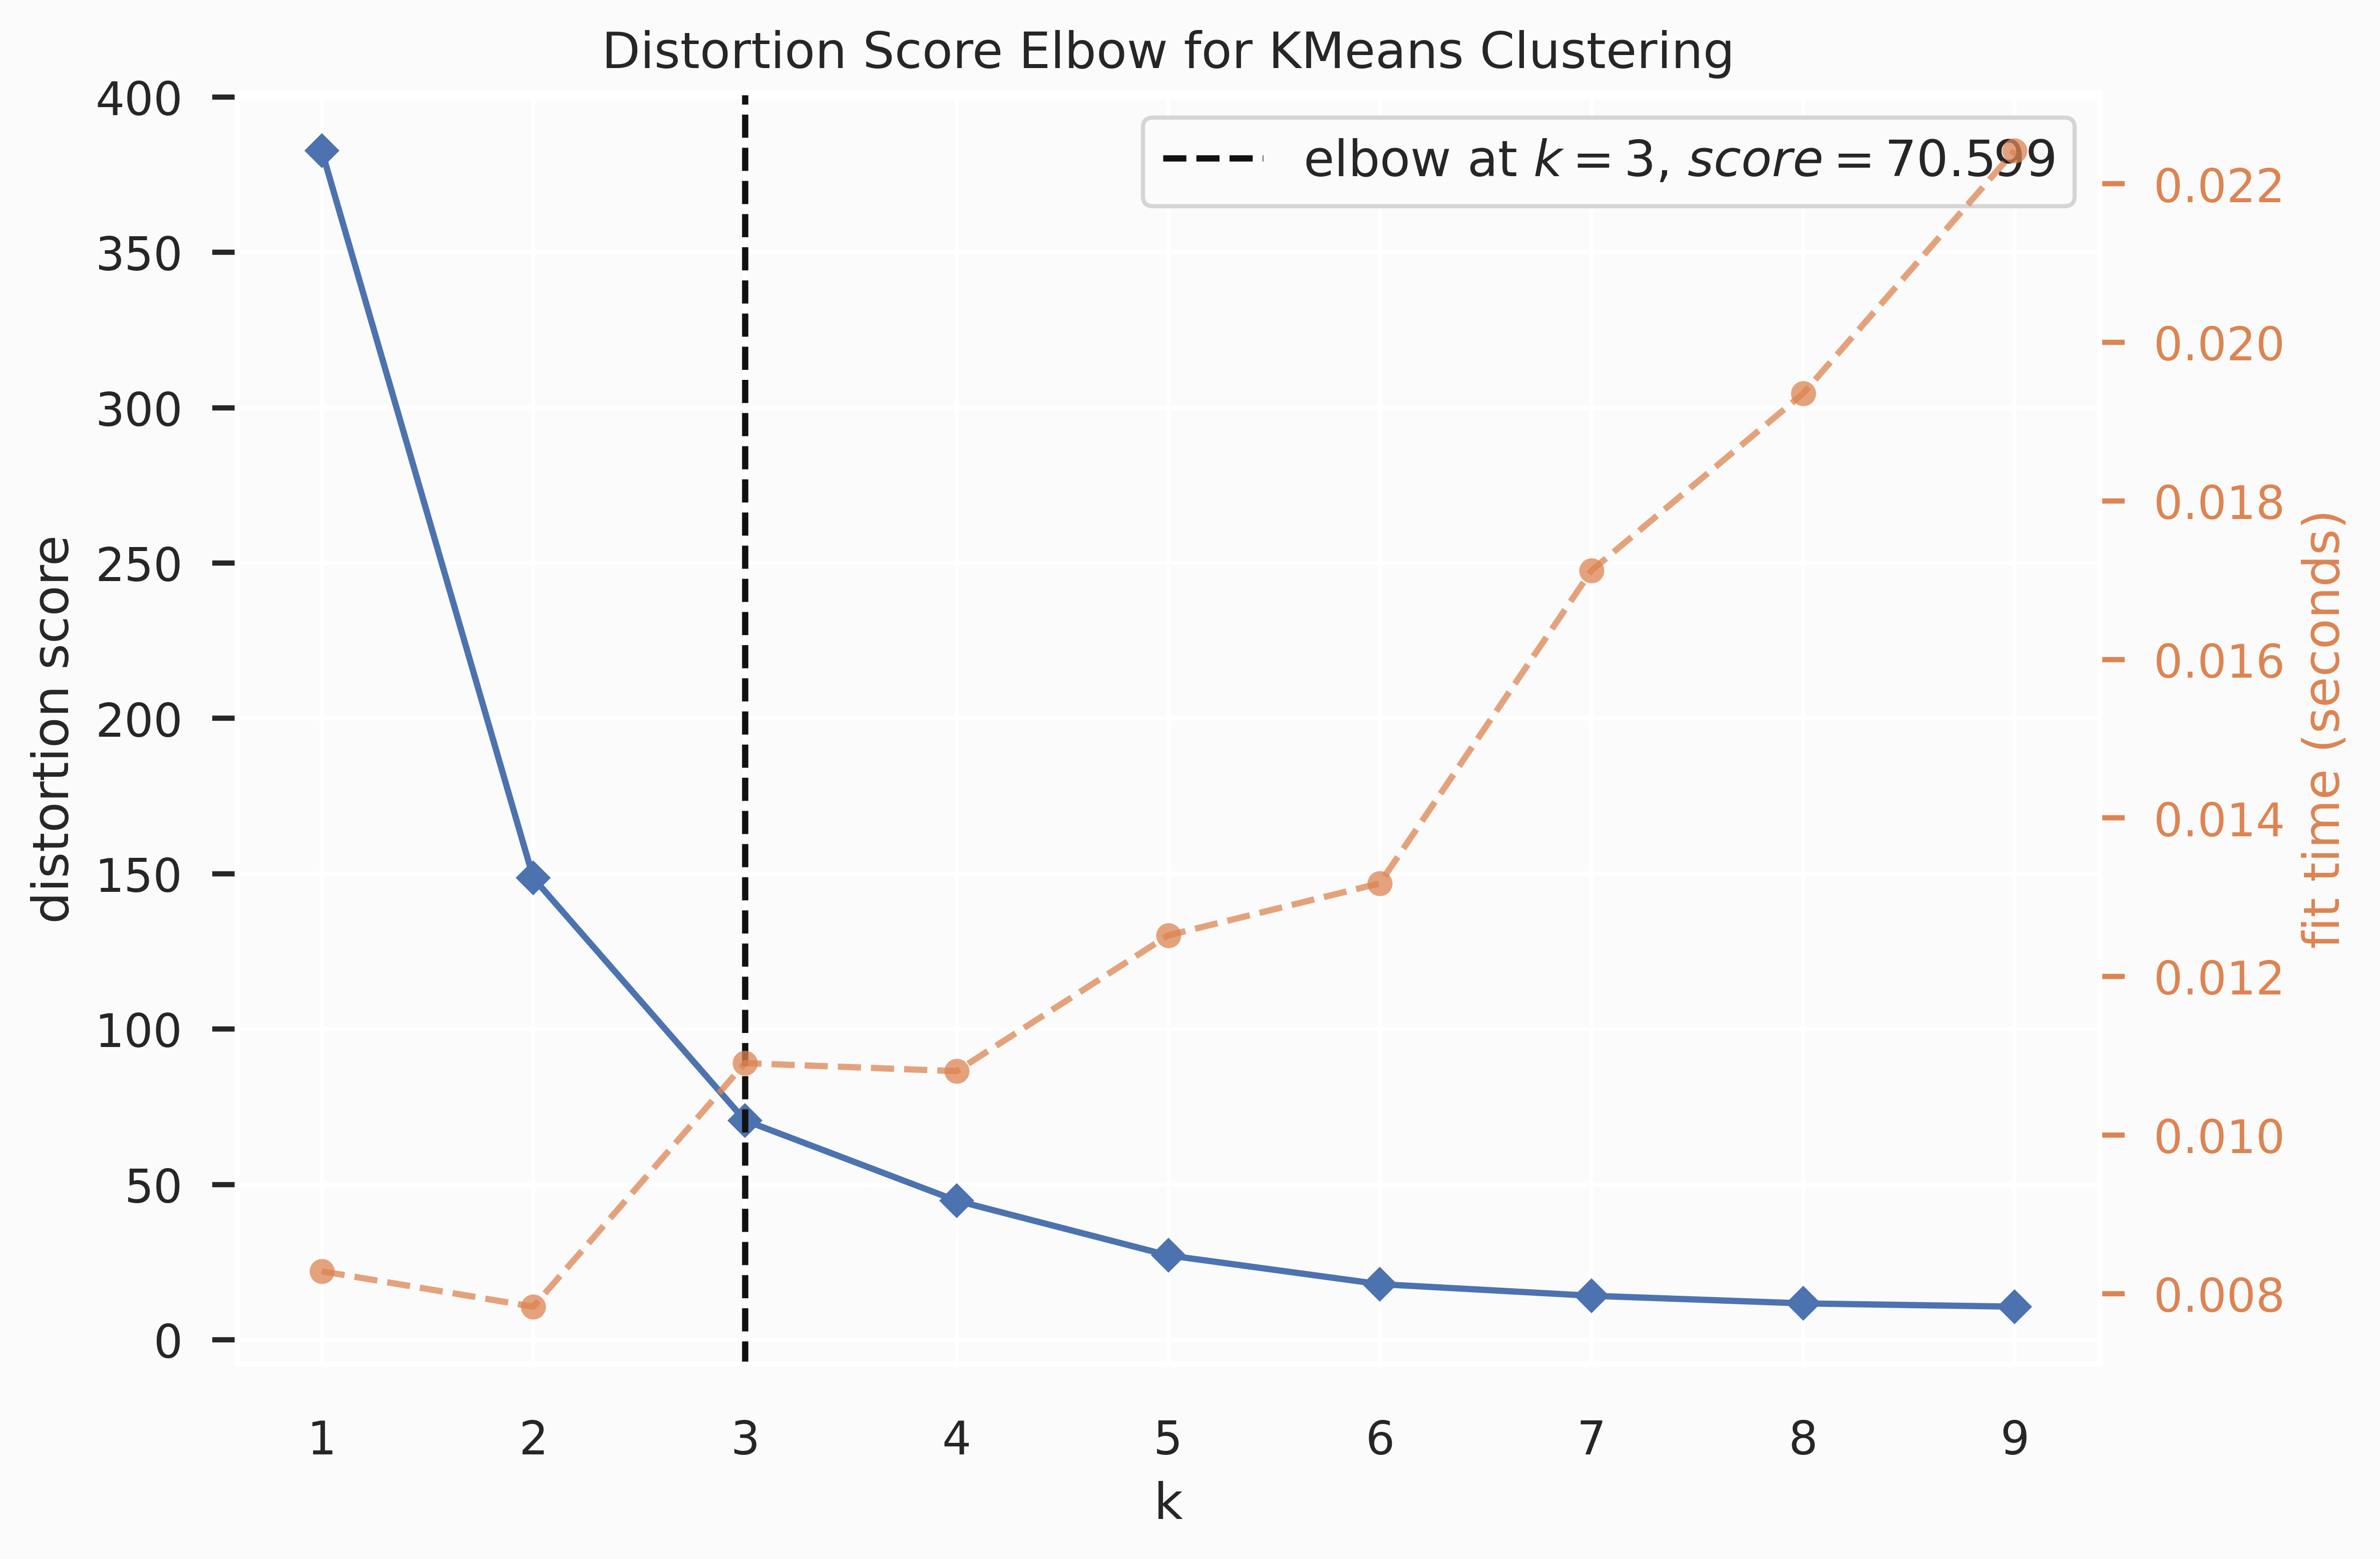

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [55]:
features = dataset_max_scaled.iloc[:, 0:7]

model = KMeans()
visualizer = KElbowVisualizer(model, k=(1,10))

visualizer.fit(features)    # Fit the data to the visualizer
visualizer.poof()           # Draw/show/poof the data

In [56]:
kmeans = KMeans(n_clusters=4)
kmeans.fit(features)
cluster_labels = kmeans.fit_predict(features)

kmeans.cluster_centers_

array([[1.        , 3.        , 0.12374435, 0.04744321, 0.04189194,
        0.06007821, 0.01926868],
       [1.23376623, 1.        , 0.09898911, 0.07464714, 0.07979174,
        0.04929172, 0.06493538],
       [2.        , 3.        , 0.0876631 , 0.14940556, 0.17195311,
        0.02485995, 0.16898714],
       [1.40425532, 2.        , 0.088164  , 0.06922869, 0.09935973,
        0.06646013, 0.09031935]])

In [57]:
silhouette_avg = metrics.silhouette_score(features, cluster_labels)
print ('silhouette coefficient for the above clutering = ', silhouette_avg)

silhouette coefficient for the above clutering =  0.7224460716379005


In [58]:
# Predicting the cluster labels
labels = kmeans.predict(features)
print(labels)
# Finding the final centroids
centroids = kmeans.cluster_centers_

[2 2 2 0 2 2 2 2 0 2 2 2 2 2 2 0 2 0 2 0 2 0 0 2 2 2 0 0 2 0 0 0 0 0 0 2 0
 2 2 0 0 0 2 2 2 2 2 2 2 2 0 0 2 2 0 0 2 2 0 0 2 2 2 2 0 2 0 2 0 0 0 0 0 2
 2 0 0 2 0 0 0 2 2 0 2 2 2 0 0 0 0 0 2 0 2 0 2 0 0 0 2 2 2 0 0 0 2 2 2 2 0
 2 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0
 0 0 0 0 0 0 0 2 2 0 2 2 2 0 0 2 2 2 2 0 0 0 2 2 0 2 0 2 0 0 0 0 0 0 0 0 0
 0 0 0 2 2 0 0 0 2 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 2 0 2 0 0 0 0 0 0 0 0 0 0 0 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 2 2 0 2 0 0 2 2 0 2 0 2 0 2 0 0 0 2 0 0 0 0 0 0 0 2 0 0 0 0
 2 0 0 2 0 0 2 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0
 2 2 0 0 0 0 0 0 2 2 0 2 0 0 2 0 2 2 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0]


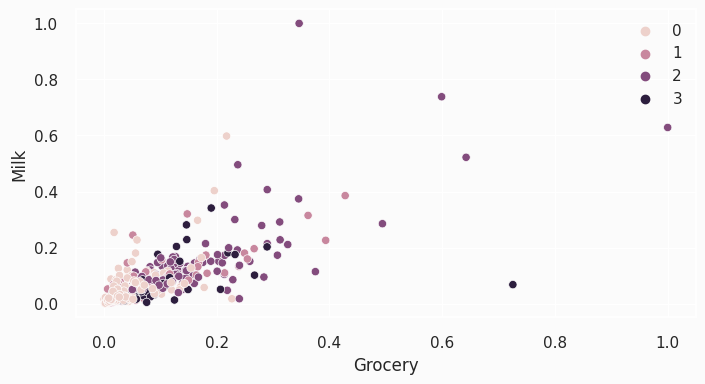

In [59]:
# plot the result
plt.figure(figsize = (8,4), dpi = 100)
sns.scatterplot(data=features,x='Grocery',y='Milk',hue=labels)
plt.show()

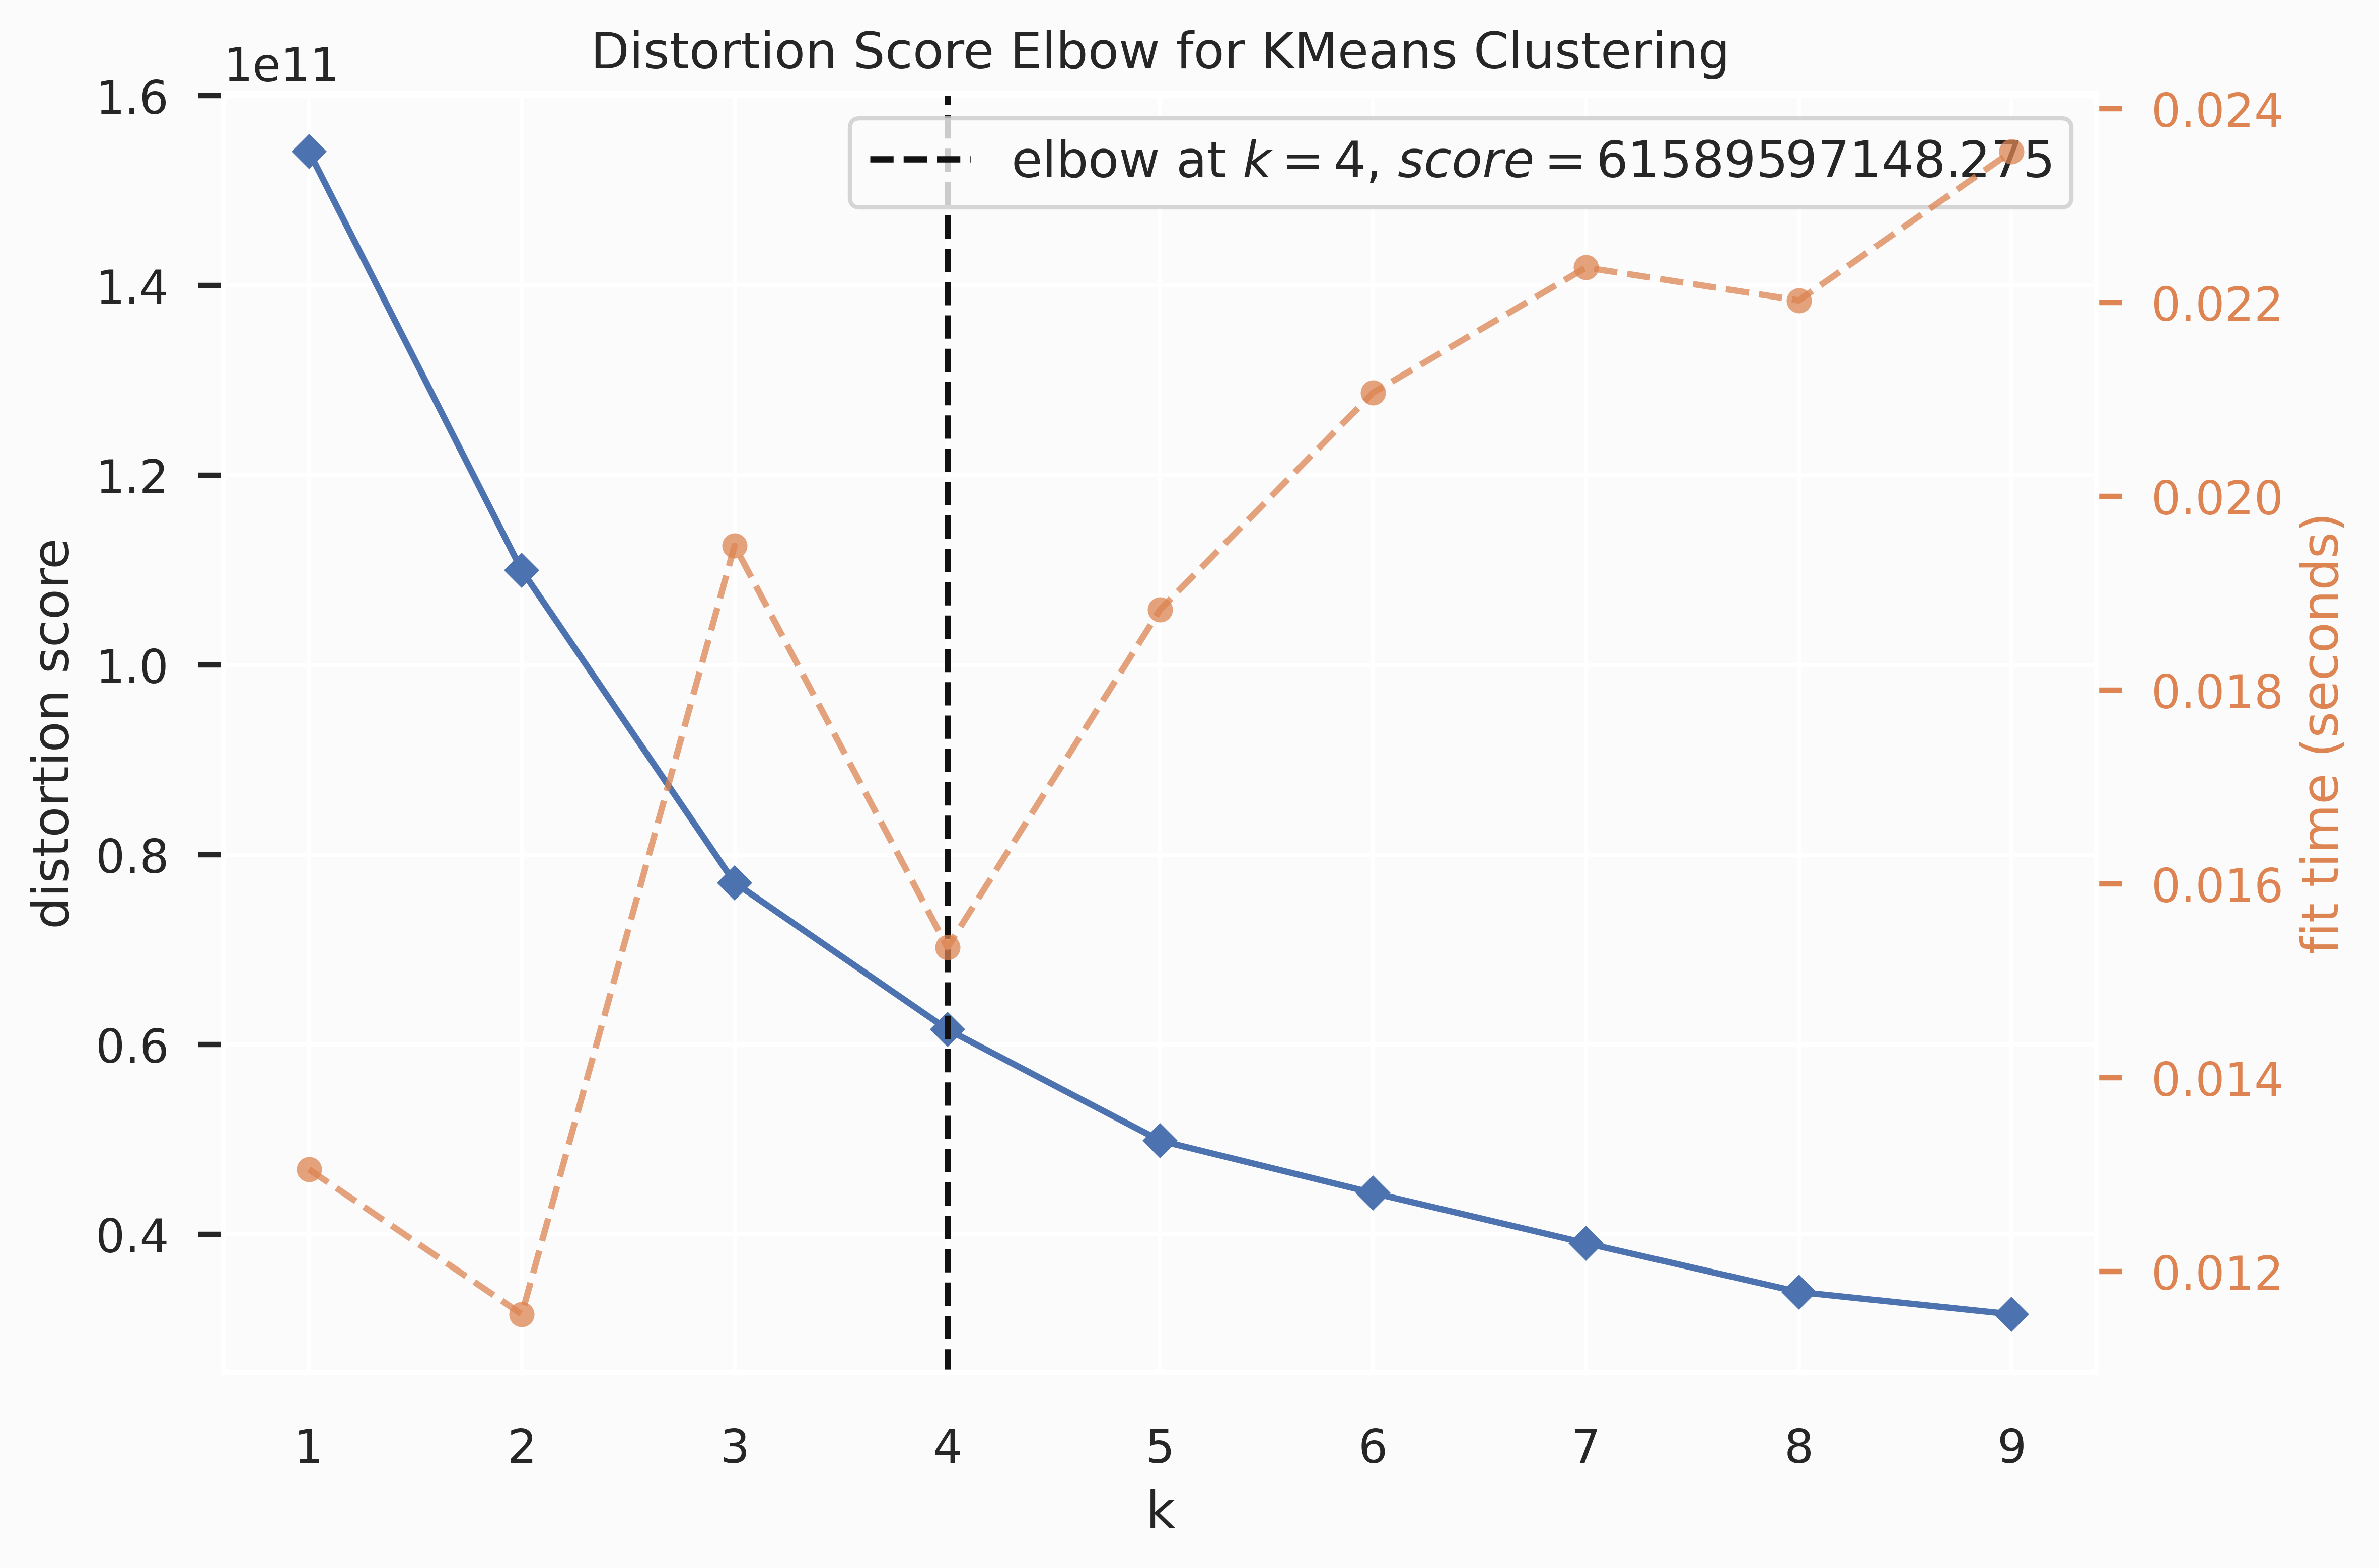

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [60]:
features_no_normalized = dataset.iloc[:, 0:7]

model = KMeans()
visualizer = KElbowVisualizer(model, k=(1,10))

visualizer.fit(features_no_normalized )    # Fit the data to the visualizer
visualizer.poof()           # Draw/show/poof the data

In [69]:
kmeans_no_normalized = KMeans(n_clusters=3)
kmeans_no_normalized.fit(features_no_normalized)
cluster_labels = kmeans_no_normalized.fit_predict(features_no_normalized)

kmeans_no_normalized.cluster_centers_

array([[1.26060606e+00, 2.55454545e+00, 8.25346970e+03, 3.82460303e+03,
        5.28045455e+03, 2.57266061e+03, 1.77305758e+03],
       [1.13333333e+00, 2.56666667e+00, 3.59414000e+04, 6.04445000e+03,
        6.28861667e+03, 6.71396667e+03, 1.03966667e+03],
       [1.96000000e+00, 2.44000000e+00, 8.00004000e+03, 1.85114200e+04,
        2.75739000e+04, 1.99668000e+03, 1.24073600e+04]])

In [70]:
silhouette_avg = metrics.silhouette_score(features_no_normalized, cluster_labels)
print ('silhouette coefficient for the above clutering = ', silhouette_avg)

silhouette coefficient for the above clutering =  0.4809514242942262


# DBSCAN

In [63]:
outlier_percent = []

for eps in np.linspace(0.001,3,50):

    # Create Model
    dbscan = DBSCAN(eps=eps,min_samples=2*dataset_max_scaled.shape[1])
    dbscan.fit(dataset_max_scaled)


    # Log percentage of points that are outliers
    perc_outliers = 100 * np.sum(dbscan.labels_ == -1) / len(dbscan.labels_)

    outlier_percent.append(perc_outliers)

[0.00371913 0.00371913 0.00490579 0.00490579 0.00823947 0.00823947
 0.00879489 0.00879489 0.00892749 0.00892749 0.01043415 0.01182855
 0.01182855 0.01246839 0.01246839 0.0125069  0.0125069  0.0128543
 0.0128543  0.01291574 0.01291574 0.01310155 0.01328499 0.01328499
 0.01332067 0.01392899 0.01393058 0.01393058 0.01419511 0.01419511
 0.01421949 0.01421949 0.015359   0.015359   0.01546699 0.01560577
 0.01560577 0.01572682 0.01574229 0.01574229 0.01596643 0.01618087
 0.01636205 0.01645324 0.01645324 0.01651008 0.01651008 0.01705769
 0.01705769 0.01709449 0.01717977 0.01717977 0.01762898 0.01762898
 0.01764826 0.01764826 0.01816192 0.01816192 0.01823745 0.01845149
 0.01855523 0.01906446 0.01963276 0.01967786 0.01985834 0.01995535
 0.01995535 0.02002153 0.02020263 0.02023693 0.02065597 0.02067615
 0.0207435  0.0207435  0.02095447 0.02095447 0.02169255 0.02180179
 0.02193083 0.02223171 0.02246146 0.02246146 0.02260087 0.02260161
 0.02268023 0.02277449 0.02287155 0.02287155 0.02305205 0.02306

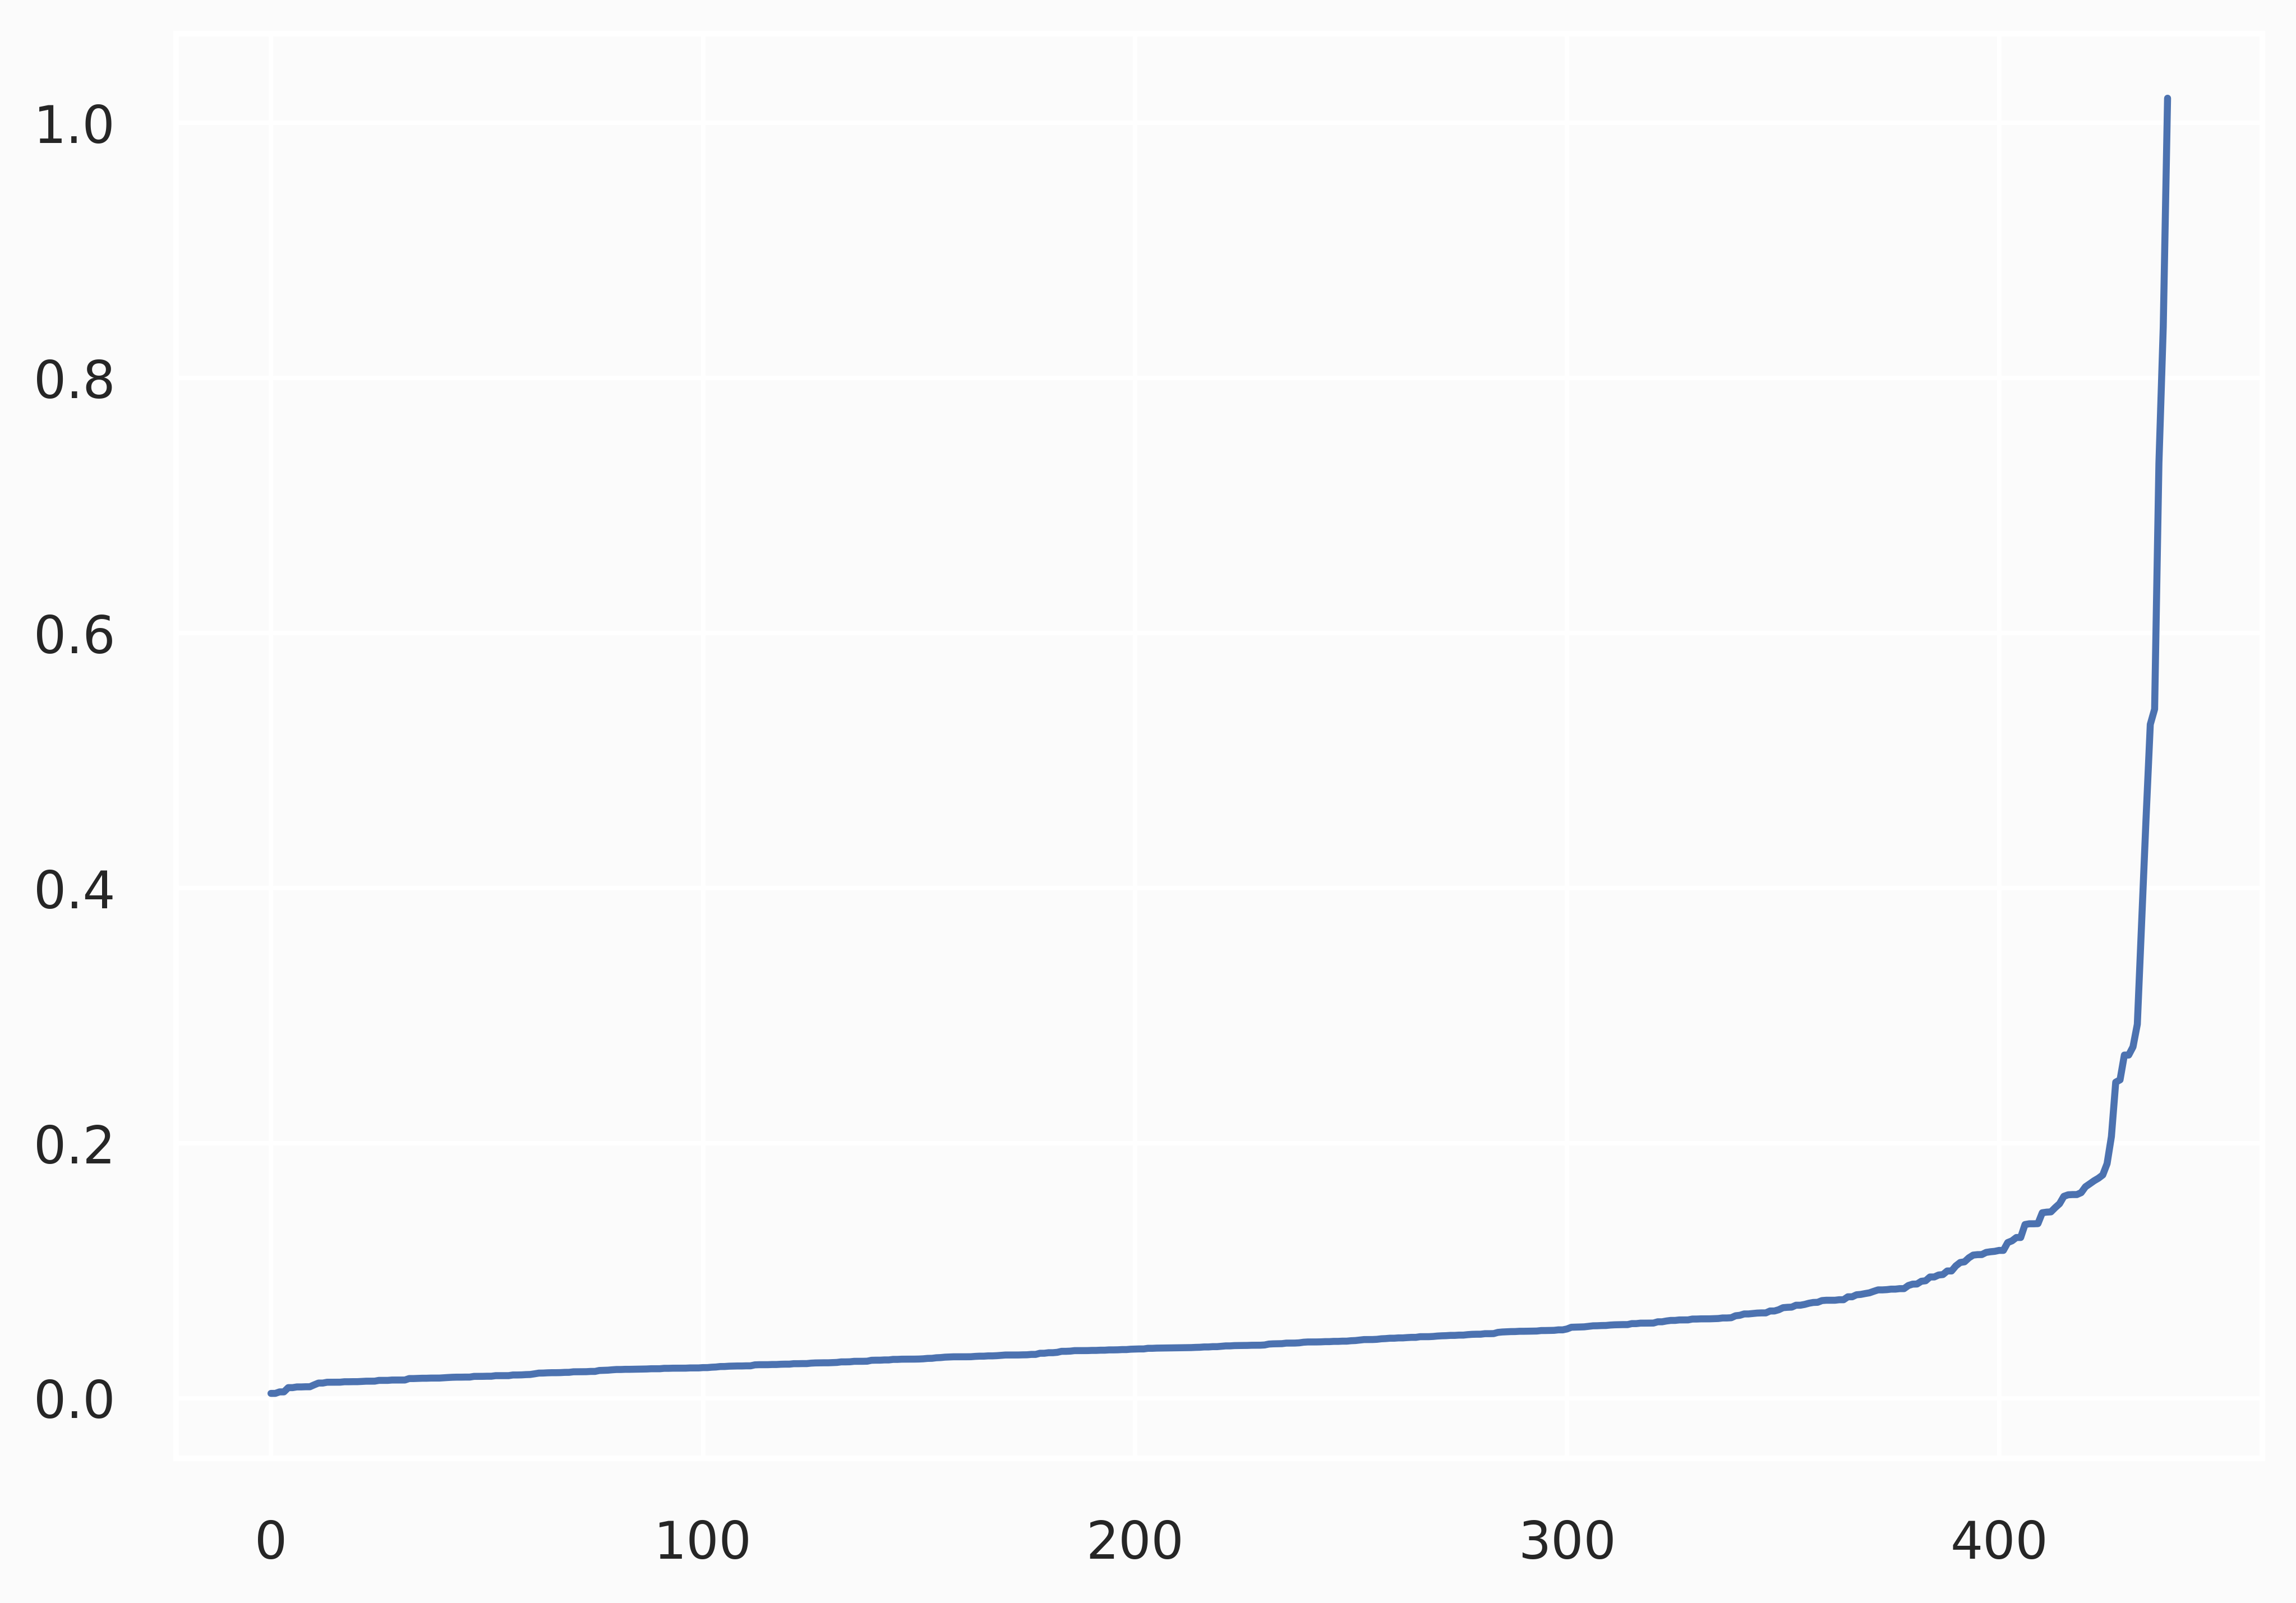

In [64]:
from sklearn.neighbors import NearestNeighbors
nearest_neighbors = NearestNeighbors(n_neighbors=4)
nearest_neighbors.fit(dataset_max_scaled)
distances, indices = nearest_neighbors.kneighbors(dataset_max_scaled)
distances = np.sort(distances, axis=0)[:, 1]
print(distances)
plt.plot(distances)
plt.show()

In [65]:
dbscan = DBSCAN(eps=0.2, min_samples=4)
dbscan.fit(dataset_max_scaled)
labels = dbscan.labels_
# label=-1 means the point is an outlier. Rest of the values represent the label/cluster number starting from 0
print(labels)
# Creating a numpy array with all values set to false by default
core_samples_mask = np.zeros_like(labels, dtype=bool)
# Setting core and border points (all points that are not -1) to True
core_samples_mask[dbscan.core_sample_indices_] = True
# Finding the number of clusters in labels (ignoring noise if present)
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)
# Printing the number of clusters and number of noise points (outliers)
print('Estimated number of clusters: %d' % n_clusters_)
print('Estimated number of noise points: %d' % n_noise_)
# Evaluating the quality of clusters
s = metrics.silhouette_score(dataset_max_scaled, dbscan.labels_)
print(f'Silhouette Coefficient for the Iris Dataset Clusters: {s:.2f}')

[ 0  0  0  1  0  0  0  0  1  0  0  0  0  0  0  1  0  1  0  1  0  1  1 -1
  0  0  1  1  0  1  1  1  1  1  1  0  1  0  0  1  1  1  0  0  0  0  0 -1
  0  0  1  1  0  0  1  1  0  0  1  1  0 -1  0  0  1 -1  1  0  1  1  1 -1
  1  0  0  1  1  0  1  1  1  0  0  1  0 -1 -1 -1  1  1  1  1  0 -1  0  1
  0  1  1  1  0  0  0  1  1  1  0  0  0  0  1  0  1  1  1  1  1  1  1  1
  1  1  1  0  1  1  1  0  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  0  1  1  1  1  1  1  1  1  1  0  0  1  0  0  0  1  1  0  0  0  0  1
  1  1  0  0  1  0  1  0  1  1  1  1  1 -1  1 -1  1  1  1  1  0  0  1  1
  1  0  1  1  3  2  3  3  2  2  3  3  3  2  3  2  3  2  3 -1  3  3  2  3
  2  3  2  3  3  3  3  2  3  3  2  3  3  3  2  3  3  3  3  3  3  3  3  3
  3  3  3  3  3  2  3  3  3  3  3 -1  3  3  3  3  3  3  3  3  3  3  3  3
  2  3  2  3  2  3  3  3  3  1  1  1  1  1  1  0  1  0  1  1  1  1  1  1
  1  1  1  1  1  4  5  4  5  4  4  5  4  4  4  4  4  4  4  5  5  4  5  5
  4  5  5  4  5  5  5  4  5  5  5  5  5 -1  5  5  5

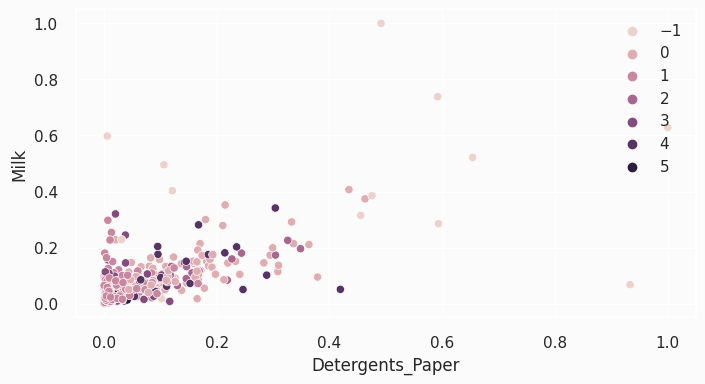

In [66]:
plt.figure(figsize = (8,4), dpi = 100)
sns.scatterplot(data=dataset_max_scaled,x='Detergents_Paper',y='Milk',hue=dbscan.labels_)
plt.show()